In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('trainingSet.csv')
if 'intercept' not in df_train.columns:
    df_train.insert(0, 'intercept', 1)

In [3]:
df = df_train.sample(random_state = 18, frac = 1)
df.reset_index(drop = True, inplace = True)

In [4]:
dfs = []
breakpoints = []
for i in range(0, df.shape[0] + 1, 520):
    breakpoints.append(i)
for i in range(len(breakpoints)-1):
    dfs.append(df.iloc[breakpoints[i]:breakpoints[i+1]])


In [5]:
accuracy_lr = np.zeros([6, 10])
accuracy_svm = np.zeros([6, 10])

In [6]:
def sigmoid(x):
    if x < 0:
        return np.exp(x)/(1 + np.exp(x))
    else:
        return 1/(1 + np.exp(-x))

eta = 0.01
maxite = 500
tol = 1e-6
lam = 0.01

def lr_fit(x,y):
    length, width = x.shape
    
    global w 
    w = np.zeros(width)
    y_hat = np.zeros(length)
    nabla = np.zeros(width)
    
    for ite in range(maxite):
# yhat
        for i in range(length):
            prod = np.dot(w,x[i,:])
            y_hat[i] = sigmoid(prod)
# nabla
        y_sum = y_hat - y
        nabla = np.matmul(y_sum, x) 
        nabla += lam * w
# w
        w_new = w - eta * nabla
        diff = w_new - w
        L2 = np.linalg.norm(diff)
#         if ite % 10 == 0:
#             print(L2)
        w = w_new
        if L2 < tol:
            break


In [7]:
def cutoff(x):
    if x >= 0.5:
        return 1
    else:
        return 0

def lr_predict(x, y):
    length, width = x.shape
    correct = 0
    predict = np.zeros(length)
    for i in range(length):
        prod = np.dot(w, x[i,:])
        prob = sigmoid(prod)
        predict[i] = cutoff(prob)
        if predict[i] == y[i]: 
            correct += 1
    return correct/length


In [8]:
eta_svm = 0.5
maxite_svm = 500
tol_svm = 1e-6
lam_svm = 0.01
    

def svm_fit(x,y):
    length, width = x.shape
    global w_svm
    nabla_svm = np.zeros(width)
    w_svm = np.zeros(width)
    y_hat_svm = np.zeros(length)
    
    for i in range(length):
        if y[i] < 1:
            y[i] = -1
    
    for ite in range(maxite_svm):
        y_hat_svm = np.matmul(w_svm,np.transpose(x)) 
        
        yy = y * y_hat_svm
        y_copy = np.zeros(length)
        for i in range(length):
            if yy[i] < 1:
                y_copy[i] = y[i]
            else:
                y_copy[i] = 0
                
        nabla_svm = -1/length * np.matmul(y_copy, x)
        nabla_svm = lam_svm * w_svm + nabla_svm
        w_new = w_svm - eta_svm * nabla_svm 
        diff = w_new - w_svm
        w_svm = w_new
        L2 = np.linalg.norm(diff)
#         if ite % 10 == 0:
#             print(f'{ite} {L2}')
        if L2 < tol_svm:
            break

In [9]:
def sign(x):
    if x >= 0:
        return 1
    else:
        return -1
 
    
def svm_predict(x,y):
    length, width = x.shape
    predict = np.zeros(length)
    correct = 0
    for i in range(length):
        if y[i] < 1:
            y[i] = -1 
        predict[i] = sign(np.dot(w_svm,x[i,:]))
        if y[i] == predict[i]:
            correct += 1
    return correct/length

In [10]:
t_frac = np.array([0.025, 0.05, 0.075, 0.1, 0.15, 0.2])
mode = 1

for i in range(10):
    test_set = dfs[i]
    X_test = test_set.drop(columns = ['decision']).to_numpy()
    y_test = test_set['decision'].to_numpy()
    S_C = df.drop(test_set.index)
    for j in range(len(t_frac)):
        train_set = S_C.sample(random_state = 32, frac = t_frac[j])

        X_train = train_set.drop(columns = ['decision']).to_numpy()
        y_train = train_set['decision'].to_numpy()

        if mode == 1:
            lr_fit(X_train,y_train)
            s = lr_predict(X_test, y_test)
            accuracy_lr[j][i] = s
        elif mode == 2:
            svm_fit(X_train,y_train)
            s = svm_predict(X_test, y_test)
            accuracy_svm[j][i] = s
        print(f'i, j, s {i} {j} {s}')

i, j, s 0 0 0.7096153846153846
i, j, s 0 1 0.6230769230769231
i, j, s 0 2 0.6365384615384615
i, j, s 0 3 0.6788461538461539
i, j, s 0 4 0.6807692307692308
i, j, s 0 5 0.6673076923076923
i, j, s 1 0 0.7192307692307692
i, j, s 1 1 0.625
i, j, s 1 2 0.7038461538461539
i, j, s 1 3 0.698076923076923
i, j, s 1 4 0.6346153846153846
i, j, s 1 5 0.7076923076923077
i, j, s 2 0 0.676923076923077
i, j, s 2 1 0.6076923076923076
i, j, s 2 2 0.6173076923076923
i, j, s 2 3 0.6865384615384615
i, j, s 2 4 0.675
i, j, s 2 5 0.6846153846153846
i, j, s 3 0 0.6807692307692308
i, j, s 3 1 0.6865384615384615
i, j, s 3 2 0.6903846153846154
i, j, s 3 3 0.7076923076923077
i, j, s 3 4 0.6634615384615384
i, j, s 3 5 0.6903846153846154
i, j, s 4 0 0.698076923076923
i, j, s 4 1 0.6942307692307692
i, j, s 4 2 0.7
i, j, s 4 3 0.6923076923076923
i, j, s 4 4 0.6403846153846153
i, j, s 4 5 0.6365384615384615
i, j, s 5 0 0.7288461538461538
i, j, s 5 1 0.6807692307692308
i, j, s 5 2 0.7019230769230769
i, j, s 5 3 0.6807692

In [12]:
mode = 2
for i in range(10):
    test_set = dfs[i]
    X_test = test_set.drop(columns = ['decision']).to_numpy()
    y_test = test_set['decision'].to_numpy()
    S_C = df.drop(test_set.index)
    for j in range(len(t_frac)):
        train_set = S_C.sample(random_state = 32, frac = t_frac[j])

        X_train = train_set.drop(columns = ['decision']).to_numpy()
        y_train = train_set['decision'].to_numpy()

        if mode == 1:
            lr_fit(X_train,y_train)
            s = lr_predict(X_test, y_test)
            accuracy_lr[j][i] = s
        elif mode == 2:
            svm_fit(X_train,y_train)
            s = svm_predict(X_test, y_test)
            accuracy_svm[j][i] = s

In [14]:
dataframe = pd.read_csv('dating.csv')
dataframe = dataframe.iloc[0:6500]
df_tem = dataframe.sample(random_state = 25, frac = 0.2)
df_5200 = dataframe.drop(df_tem.index)
df_5200.reset_index(drop = True, inplace = True)

In [15]:
df_nbc = df_5200.sample(random_state = 18, frac = 1)
df_nbc.reset_index(drop = True, inplace = True)

cols_categorial = ['gender','race','race_o','samerace', 'field', 'decision']

cols_continuous = dataframe.columns.difference(cols_categorial, sort=False)

cols_spec1 = ['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence',
       'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests',
       'attractive_important', 'sincere_important', 'intelligence_important',
       'funny_important', 'ambition_important', 'shared_interests_important']
    
cols_spec2 = ['age', 'age_o']

In [16]:
def printbin(df, col, binsize):
    
    binmin = 0
    binmax = 10;

    if (col in cols_spec1):
        filt = df[col] > 1.0
        df.loc[filt,col] = 1.0
        binmin = 0.0
        binmax = 1.0
    elif (col in cols_spec2):
        filt = df[col] > 58.0
        df.loc[filt,col] = 58.0
        binmin = 18.0
        binmax = 58.0
    elif (col == 'interests_correlate'):
        binmin = -1.0
        binmax = 1.0
    else:
        filt = df[col] > 10.0
        df.loc[filt,col] = 10.0
        binmin = 0.0
        binmax = 10.0
    
    if binmax == 0.0:
        raise Exception("Bin not updated")
           
    interval = (binmax - binmin)/binsize
    thresholds = np.linspace(binmin, binmax, binsize + 1)
    
#     print(thresholds)
    df[col]= pd.cut(df[col], bins=thresholds, labels = range(binsize), include_lowest = True)

     
    
def discretize(df, binsize):
    for x in cols_continuous:
        printbin(df, x, binsize)
        

df_dis = df_nbc.copy()
discretize(df_dis, 5)

In [17]:
df_fold = []
breakpoints = []
for i in range(0, df_dis.shape[0] + 1, 520):
    breakpoints.append(i)
for i in range(len(breakpoints)-1):
    df_fold.append(df_dis.iloc[breakpoints[i]:breakpoints[i+1]])
df_fold[9]


,gender,age,age_o,race,race_o,samerace,importance_same_race,importance_same_religion,field,pref_o_attractive,...,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,like,decision
4680,0,0,1,2,4,0,3,0,75,1,...,4,4,4,4,4,3,2,0,2,0
4681,1,1,0,2,2,1,0,0,121,0,...,2,2,2,2,3,0,3,4,3,1
4682,0,1,1,0,1,0,0,0,120,1,...,1,3,2,3,3,3,4,2,1,0
4683,1,0,0,2,2,1,3,3,23,0,...,3,3,2,3,0,0,3,1,2,0
4684,0,0,1,0,2,0,0,0,142,1,...,2,3,1,2,3,1,1,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,0,0,1,2,3,0,3,3,183,0,...,3,3,3,3,3,2,1,0,2,0
5196,1,1,0,3,0,0,1,3,26,0,...,4,4,3,3,2,1,2,2,2,0
5197,1,1,0,0,0,1,3,0,23,0,...,3,4,3,2,1,2,4,4,2,0
5198,0,1,1,0,0,1,1,0,23,0,...,3,3,2,2,3,3,1,0,2,0


In [18]:
def compute_prior(y):
    prior[1] = y.sum() / len(y)
    prior[0] = 1 - prior[1]

In [19]:
def compute_conditional_prob(x, y):
    y1 = y.sum()
    y0 = len(y) - y1
    
    D = np.c_[x,y]
    for col in range(x.shape[1]):
        max_value = x[:,col].max()
        if max_value > 5:
            max_value = 209
        else:
            max_value = 4
        for v in range(max_value + 1):
            count0 = len(np.where((D[:,col] == v) & (D[:, -1] == 0))[0])
            count1 = len(np.where((D[:,col] == v) & (D[:, -1] == 1))[0])
#             if col == 0:
#                 print(f'count {v} {col} {count0} {count1}')
            p = count1 / y1
            q = count0 / y0
            conditional_prob[(col, v, 0)] = q
            conditional_prob[(col, v, 1)] = p

            if count0 == 0:
                conditional_prob[(col, v, 0)] = 1 / (y0 + max_value + 1)
            if count1 == 0:
                conditional_prob[(col, v, 1)] = 1 / (y1 + max_value + 1)
        

         

In [20]:
def nbc_fit(X, y):
    global prior
    global conditional_prob
    prior = {}
    conditional_prob = {}
    compute_prior(y)
    compute_conditional_prob(X, y)
    

In [21]:
def nbc_predict(x, y):
    correct = 0
    predict = np.zeros(x.shape[0])
    for row in range(x.shape[0]):
        p0 = 0
        p1 = 0
        for col in range(x.shape[1]):
            value = x[row][col]
            p0 += np.log(conditional_prob[col, value, 0])
            p1 += np.log(conditional_prob[col, value, 1])
        p0 += np.log(prior[0])
        p1 += np.log(prior[1])
        if p0 >= p1:
            predict[row] = 0
        else:
            predict[row] = 1
        if predict[row] == y[row]:
            correct += 1
    return correct / x.shape[0]
            

In [22]:
accuracy_nbc = np.zeros([6,10])

for i in range(10):
    test_set = df_fold[i]
    X_test = test_set.drop(columns = ['decision']).to_numpy()
    y_test = test_set['decision'].to_numpy()
    S_C = df_dis.drop(test_set.index)
    for j in range(len(t_frac)):
        train_set = S_C.sample(random_state = 32, frac = t_frac[j])

        X_train = train_set.drop(columns = ['decision']).to_numpy()
        y_train = train_set['decision'].to_numpy()

        nbc_fit(X_train, y_train)
        s = nbc_predict(X_test, y_test)
        accuracy_nbc[j][i] = s
        print(f'i, j, s {i} {j} {s}')

i, j, s 0 0 0.7096153846153846
i, j, s 0 1 0.75
i, j, s 0 2 0.7615384615384615
i, j, s 0 3 0.7634615384615384
i, j, s 0 4 0.7403846153846154
i, j, s 0 5 0.7673076923076924
i, j, s 1 0 0.675
i, j, s 1 1 0.6865384615384615
i, j, s 1 2 0.7
i, j, s 1 3 0.7384615384615385
i, j, s 1 4 0.7211538461538461
i, j, s 1 5 0.7307692307692307
i, j, s 2 0 0.6807692307692308
i, j, s 2 1 0.7038461538461539
i, j, s 2 2 0.7076923076923077
i, j, s 2 3 0.7288461538461538
i, j, s 2 4 0.7269230769230769
i, j, s 2 5 0.7230769230769231
i, j, s 3 0 0.7288461538461538
i, j, s 3 1 0.7288461538461538
i, j, s 3 2 0.7423076923076923
i, j, s 3 3 0.7365384615384616
i, j, s 3 4 0.7538461538461538
i, j, s 3 5 0.7673076923076924
i, j, s 4 0 0.7192307692307692
i, j, s 4 1 0.7346153846153847
i, j, s 4 2 0.7346153846153847
i, j, s 4 3 0.7365384615384616
i, j, s 4 4 0.7557692307692307
i, j, s 4 5 0.7596153846153846
i, j, s 5 0 0.675
i, j, s 5 1 0.6942307692307692
i, j, s 5 2 0.7211538461538461
i, j, s 5 3 0.7211538461538461
i

In [23]:
ave_lr = np.mean(accuracy_lr, axis = 1)
ave_svm = np.mean(accuracy_svm, axis = 1)
ave_nbc = np.mean(accuracy_nbc, axis = 1)
sterr_lr = np.std(accuracy_lr, axis = 1) / np.sqrt(10)
sterr_svm = np.std(accuracy_svm, axis = 1) / np.sqrt(10)
sterr_nbc = np.std(accuracy_nbc, axis = 1) / np.sqrt(10)

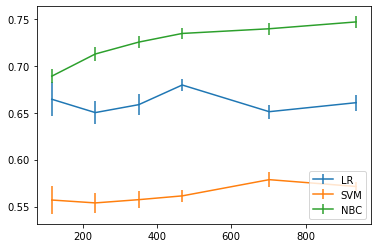

In [24]:
fig = plt.figure()
plt.errorbar(t_frac * 0.9 * 5200, ave_lr, yerr=sterr_lr, label='LR')
plt.errorbar(t_frac * 0.9 * 5200, ave_svm, yerr=sterr_svm, label='SVM')
plt.errorbar(t_frac * 0.9 * 5200, ave_nbc, yerr=sterr_nbc, label='NBC')
plt.legend(loc='lower right')
plt.savefig('accuracy.png', dpi = 150)
plt.show()

In [25]:
accuracy_svm

array([[0.59038462, 0.65384615, 0.52692308, 0.60961538, 0.54807692,
        0.57307692, 0.53076923, 0.49038462, 0.51923077, 0.52692308],
       [0.55961538, 0.47692308, 0.51538462, 0.55192308, 0.55192308,
        0.58846154, 0.55192308, 0.57884615, 0.58846154, 0.575     ],
       [0.55      , 0.48653846, 0.58846154, 0.53461538, 0.55192308,
        0.575     , 0.55769231, 0.57692308, 0.58846154, 0.56346154],
       [0.54423077, 0.51923077, 0.58076923, 0.57307692, 0.55      ,
        0.57884615, 0.55576923, 0.55      , 0.58846154, 0.57307692],
       [0.56346154, 0.6       , 0.575     , 0.64615385, 0.57692308,
        0.58269231, 0.55576923, 0.55961538, 0.55769231, 0.56923077],
       [0.58653846, 0.60192308, 0.56538462, 0.56538462, 0.58269231,
        0.57307692, 0.55384615, 0.575     , 0.55384615, 0.55576923]])

In [26]:
from scipy import stats

In [27]:
stats.ttest_ind(ave_lr,ave_svm)

Ttest_indResult(statistic=16.510641783841606, pvalue=1.3859056868458644e-08)

In [ ]:
$